In [34]:
import os, sys
import numpy as np
import dask
import xarray as xr
import xgcm

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox import *

In [35]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)
#print(cluster.job_script())
w = cluster.start_workers(17)

In [36]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

<Client: scheduler='tcp://10.148.1.14:33297' processes=34 cores=136>

--- 

# For each hour

__________

In [12]:
sli = slice(0,None,4) # required to make worldwide plots, otherwise, half the globe is plotted
out_dir = '/home1/scratch/xyu/mit_zarr/UV/LLC1080_t/'  
Nt = 1

In [15]:
sli = slice(0,None,1) # required to make worldwide plots, otherwise, half the globe is plotted
out_dir = '/home1/scratch/xyu/mit_zarr/UV/LLC4320_t/'  
Nt = 1

In [ ]:
V = ['SSU']

for v in V:

        #
    data_dir = root_data_dir+v+'/'
    iters, time = get_iters_time(v, data_dir, delta_t=25.)
    #it = np.arange(8640).astype(int)*Nt # tmp
    it = np.arange(720).astype(int)*Nt # tmp    
    assert it[-1]+Nt<time.size
        #
    p = 'C'
    vdrop = ['XC','YC','Depth','rA']
    if v is 'SSU':
        p = 'W'
        vdrop = ['dxC','dyG','rAw']         
    elif v is 'SSV':
        p = 'S'
        vdrop = ['dxG','dyC','rAs']        
        #
    ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
        #
        
    for i, t in enumerate(it):
        #
        file_out = out_dir+'%s_t%04d.zarr'%(v,i)
        dv = ds[v].isel(time=slice(t,t+Nt), i_g=sli, j=sli) 
        dv = dv.drop(vdrop).to_dataset()
        dv.to_zarr(file_out, mode='w')     

In [ ]:
V = ['SSV']

for v in V:

        #
    data_dir = root_data_dir+v+'/'
    iters, time = get_iters_time(v, data_dir, delta_t=25.)
    it = np.arange(720).astype(int)*Nt # tmp
    assert it[-1]+Nt<time.size
        #
    p = 'C'
    vdrop = ['XC','YC','Depth','rA']
    if v is 'SSU':
        p = 'W'
        vdrop = ['dxC','dyG','rAw']         
    elif v is 'SSV':
        p = 'S'
        vdrop = ['dxG','dyC','rAs']        
        #
    ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
        #
        
    for i, t in enumerate(it):
        #
        file_out = out_dir+'%s_t%04d.zarr'%(v,i)
        dv = ds[v].isel(time=slice(t,t+Nt), i=sli, j_g=sli) 
        dv = dv.drop(vdrop).to_dataset()
        dv.to_zarr(file_out, mode='w')     

_____
# For each face

In [37]:
V = ['SSU','SSV']

out_dir = '/home1/scratch/xyu/mit_zarr/UV/LLC4320/'  
root_data_dir = '/home/datawork-lops-osi/data/mit4320/'
grid_dir = root_data_dir+'grid/'
face_all = [1,2,4,5,7,8,10,11]

#face_all = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#face_all = [7, 8, 9, 10, 11, 12]
#face_all = [1]

sli = slice(0,None,1) # required to make worldwide plots, otherwise, half the globe is plotted
time_begin = 30*24*1 # 1 months
time_end = 30*24*4 # 4 months

In [38]:
V = ['SSU']

for face in face_all :
    
    for v in V:

        data_dir = root_data_dir+v+'/'
              
        iters, time = get_iters_time(v, data_dir, delta_t=25.)
    
        p = 'C'
        vdrop = ['XC','YC','CS','SN','rA','Depth']
        if v is 'SSU':
            p = 'W'
            vdrop = ['dxC','dyG','rAw']
            
        elif v is 'SSV':
            p = 'S'
            vdrop = ['dxG','dyC','rAs']
            
        ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)
        
        dv = ds[v].isel(time=slice(time_begin, time_end), face=face, i_g=sli, j=sli) 
        dv = dv.drop(vdrop).to_dataset()
        file_out = out_dir+'/%s_f%02d_2.zarr'%(v,face)
        %time dv.to_zarr(file_out, mode='w')                    
        dsize = getsize(file_out)
        print('face=%d - allready processed'%(face))

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 20.4 s, sys: 1.71 s, total: 22.1 s
Wall time: 1min 20s
face=1 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 19.1 s, sys: 1.5 s, total: 20.6 s
Wall time: 1min 18s
face=2 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 19 s, sys: 1.59 s, total: 20.5 s
Wall time: 1min 18s
face=4 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 22.6 s, sys: 1.91 s, total: 24.5 s
Wall time: 1min 17s
face=5 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 26 s, sys: 2.02 s, total: 28 s
Wall time: 1min 15s
face=7 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 26.7 s, sys: 1.88 s, total: 28.5 s
Wall time: 1min 18s
face=8 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 25.8 s, sys: 1.79 s, total: 27.6 s
Wall time: 1min 15s
face=10 - allready processed


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


CPU times: user 28.7 s, sys: 2.06 s, total: 30.7 s
Wall time: 1min 15s
face=11 - allready processed


In [40]:
V = ['SSV']

for face in face_all :
    
    for v in V:

        data_dir = root_data_dir+v+'/'
        iters, time = get_iters_time(v, data_dir, delta_t=25.)
    
        p = 'C'
        vdrop = ['XC','YC','CS','SN','rA','Depth']
        if v is 'SSU':
            p = 'W'
            vdrop = ['dxC','dyG','rAw']
            
        elif v is 'SSV':
            p = 'S'
            vdrop = ['dxG','dyC','rAs']
            
        ds = get_compressed_data(v, data_dir, grid_dir, iters=iters, time=time, client=client, point=p)      
        dv = ds[v].isel(time=slice(time_begin, time_end), face=face, i=sli, j_g=sli) 
        dv = dv.drop(vdrop).to_dataset()
        #print(dv)
        file_out = out_dir+'/%s_f%02d_2.zarr'%(v,face)
        dv.to_zarr(file_out, mode='w')                    
        dsize = getsize(file_out)
        print('face=%d - allready processed'%(face))

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:249: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


face=1 - allready processed
face=2 - allready processed
face=4 - allready processed
face=5 - allready processed
face=7 - allready processed
face=8 - allready processed
face=10 - allready processed
face=11 - allready processed


_______
# Rotation (for each face)

In [8]:
D = [xr.open_zarr(out_dir+'SSU_f%02d.zarr'%(face)) for face in face_all]
ds_u = xr.concat(D, dim='face')

D = [xr.open_zarr(out_dir+'SSV_f%02d.zarr'%(face)) for face in face_all]
ds_v = xr.concat(D, dim='face')

grid = xr.open_zarr('/home1/scratch/xyu/grid/mit_grid.zarr')

ds = xr.merge([ds_u,ds_v,grid])
print(ds)
print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, time: 720)
Coordinates:
    dtime    (time) datetime64[ns] 2011-11-15 2011-11-15T01:00:00 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    CS       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    Depth    (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    SN       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    XC       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 

In [9]:
grid = xgcm.Grid(ds, periodic=['X', 'Y'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   i (4320) --> left
  * left     i_g (4320) --> center
Y Axis (periodic):
  * center   j (4320) --> left
  * left     j_g (4320) --> center

In [10]:
E_dir = '/home1/scratch/xyu/mit_zarr/UV/LLC4320/'

In [52]:
for face in face_all:
    
    U_ij = grid.interp(ds['SSU'],'X')
    V_ij = grid.interp(ds['SSV'],'Y')
    
    SSU_rotation = grid.interp(U_ij*ds.CS - V_ij*ds.SN,'X')
    SSV_rotation = grid.interp(U_ij*ds.SN + V_ij*ds.CS,'Y')
    
    SSU_rotation = np.real(SSU_rotation).rename('SSU_rotation')
    SSU_rotation = SSU_rotation.chunk({'time': 1,'i_g':4320,'j':4320})
    SSU_rotation.to_dataset().to_zarr(E_dir+'SSU_rotation_f%02d.zarr'% (face), mode='w')

    SSV_rotation = np.real(SSV_rotation).rename('SSV_rotation')
    SSV_rotation = SSV_rotation.chunk({'time': 1,'i':4320,'j_g':4320})
    SSV_rotation.to_dataset().to_zarr(E_dir+'SSV_rotation_f%02d.zarr'% (face), mode='w')   
    
    print('face=%d - allready processed'%(face))

face=6 - allready processed


In [11]:
for face in range(ds['face'].size):
    
    U_ij = grid.interp(ds['SSU'].isel(face=face),'X')
    V_ij = grid.interp(ds['SSV'].isel(face=face),'Y')
    
    SSU_rotation = grid.interp(U_ij*ds.CS.isel(face=face) - V_ij*ds.SN.isel(face=face),'X')
    SSV_rotation = grid.interp(U_ij*ds.SN.isel(face=face) + V_ij*ds.CS.isel(face=face),'Y')
    
    SSU_rotation = np.real(SSU_rotation).rename('SSU_rotation')
    SSU_rotation = SSU_rotation.chunk({'time': 1,'i_g':4320,'j':4320})
    SSU_rotation.to_dataset().to_zarr(E_dir+'SSU_rotation_f%02d.zarr'% (face), mode='w')

    SSV_rotation = np.real(SSV_rotation).rename('SSV_rotation')
    SSV_rotation = SSV_rotation.chunk({'time': 1,'i':4320,'j_g':4320})
    SSV_rotation.to_dataset().to_zarr(E_dir+'SSV_rotation_f%02d.zarr'% (face), mode='w')   
    
    print('face=%d - allready processed'%(face))

face=0 - allready processed
face=1 - allready processed
face=2 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=3 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=4 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=5 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=6 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=7 - allready processed
face=8 - allready processed
face=9 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=10 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

face=11 - allready processed


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


face=12 - allready processed


_____

# Plots

In [36]:
D = [xr.open_zarr(E_dir+'SSU_rotation_f%02d.zarr'%(face)) for face in range(13)]
ds_SSU = xr.concat(D, dim='face')

D = [xr.open_zarr(E_dir+'SSV_rotation_f%02d.zarr'%(face)) for face in range(13)]
ds_SSV = xr.concat(D, dim='face')

grid = xr.open_zarr('/home1/scratch/xyu/grid/mit_grid.zarr')
ds_uv = xr.merge([ds_SSU,ds_SSV, grid])
print(ds_uv)

<xarray.Dataset>
Dimensions:       (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, time: 1440)
Coordinates:
  * face          (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g           (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * j             (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * time          (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 ...
  * i             (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * j_g           (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    CS            (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    Depth         (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    SN            (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    XC            (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    XG            (face, j_g,

In [37]:
def quick_llc_plot(data, axis_off=False, **kwargs):
    face_to_axis = {0: (2, 0), 1: (1, 0), 2: (0, 0),
                    3: (2, 1), 4: (1, 1), 5: (0, 1),
                    7: (0, 2), 8: (1, 2), 9: (2, 2),
                    10: (0, 3), 11: (1, 3), 12: (2, 3)}
    transpose = [7, 8, 9, 10, 11, 12]
    gridspec_kw = dict(left=0, bottom=0, right=4, top=4, wspace=0, hspace=0)
    fig, axes = plt.subplots(nrows=3, ncols=4, gridspec_kw=gridspec_kw)
    for face, (j, i) in face_to_axis.items():
        data_ax = data.isel(face=face)
        ax = axes[j,i]
        yincrease = True
        if face in transpose:
            data_ax = data_ax.transpose()
            yincrease = False
        data_ax.plot(ax=ax, yincrease=yincrease, **kwargs)
        if axis_off:
            ax.axis('off')
        ax.set_title('')

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.148.1.106:41683 remote=tcp://10.148.1.106:49624>


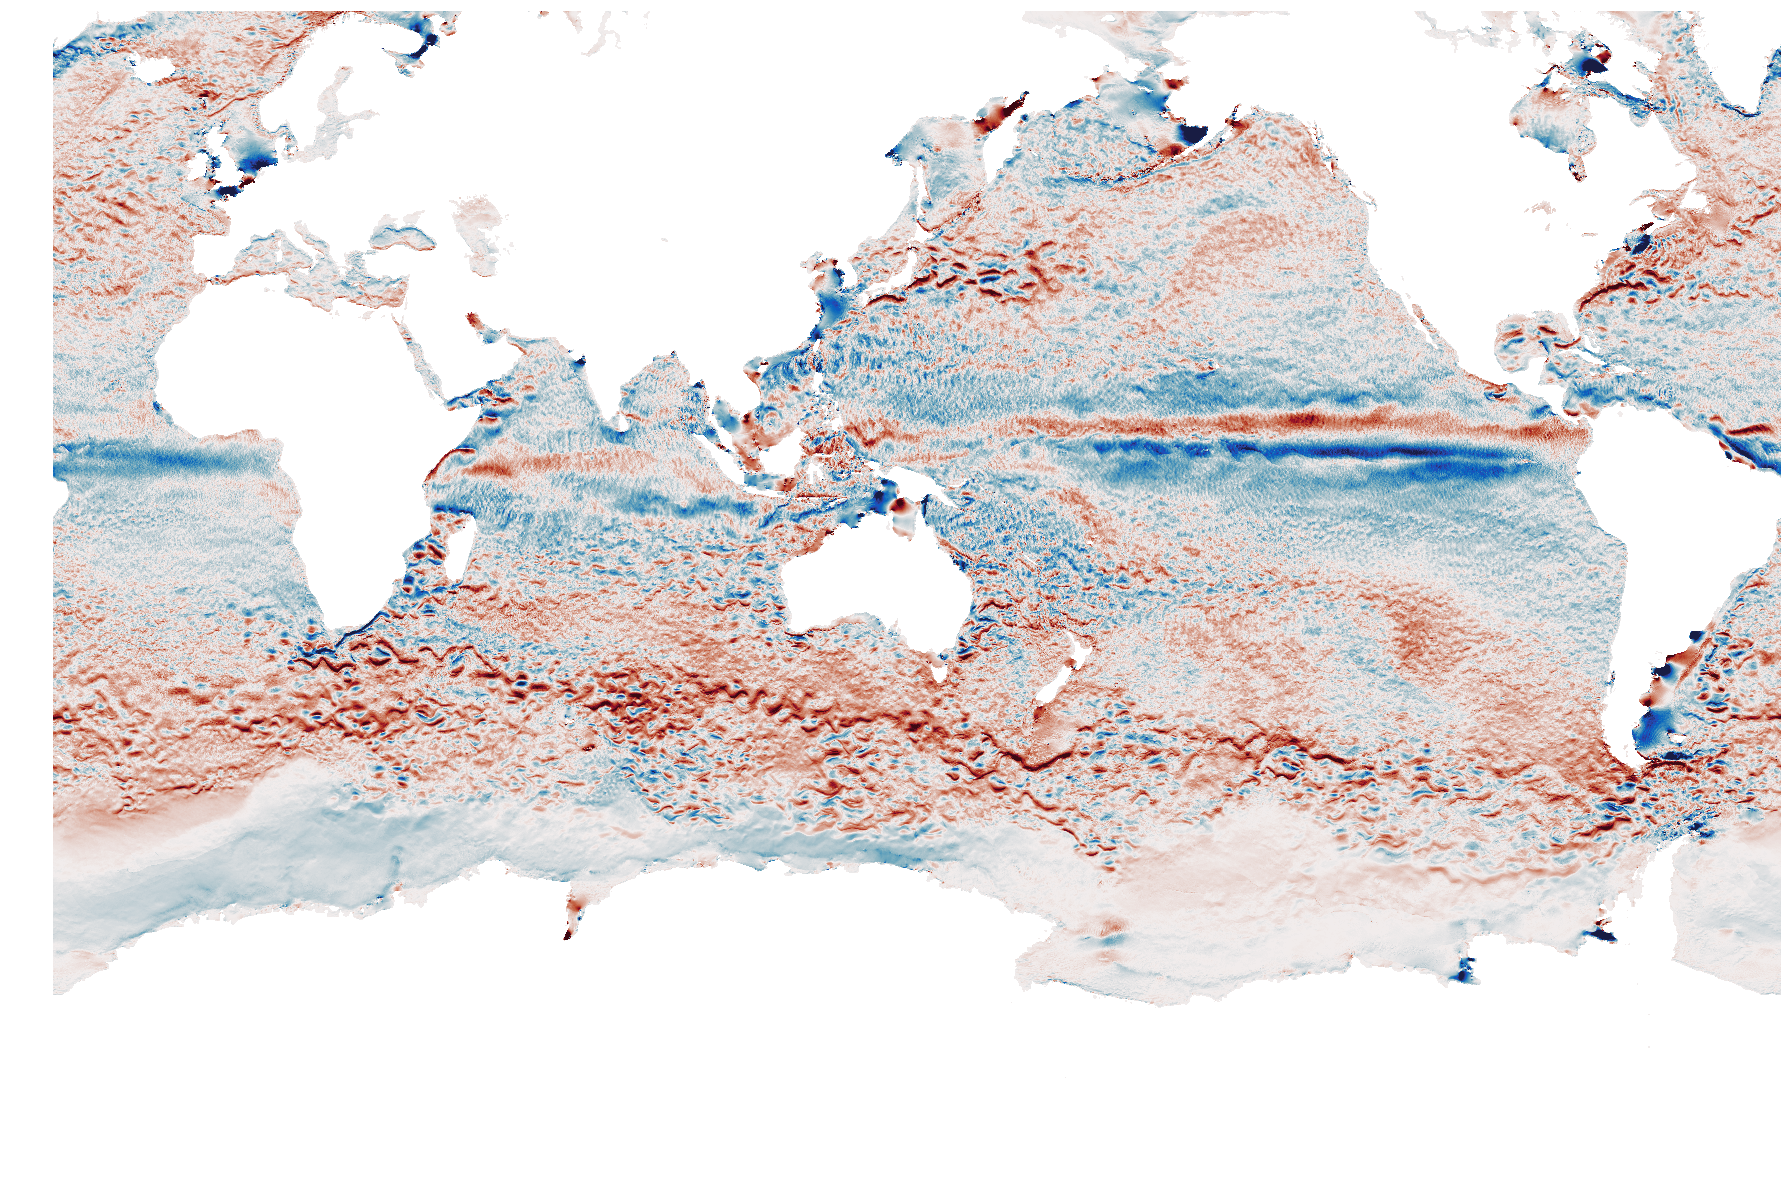

In [38]:
quick_llc_plot(ds_uv['SSU_rotation'].isel(time=1), vmin=-1, vmax=1, add_colorbar=False, axis_off=True, cmap = cm.balance)

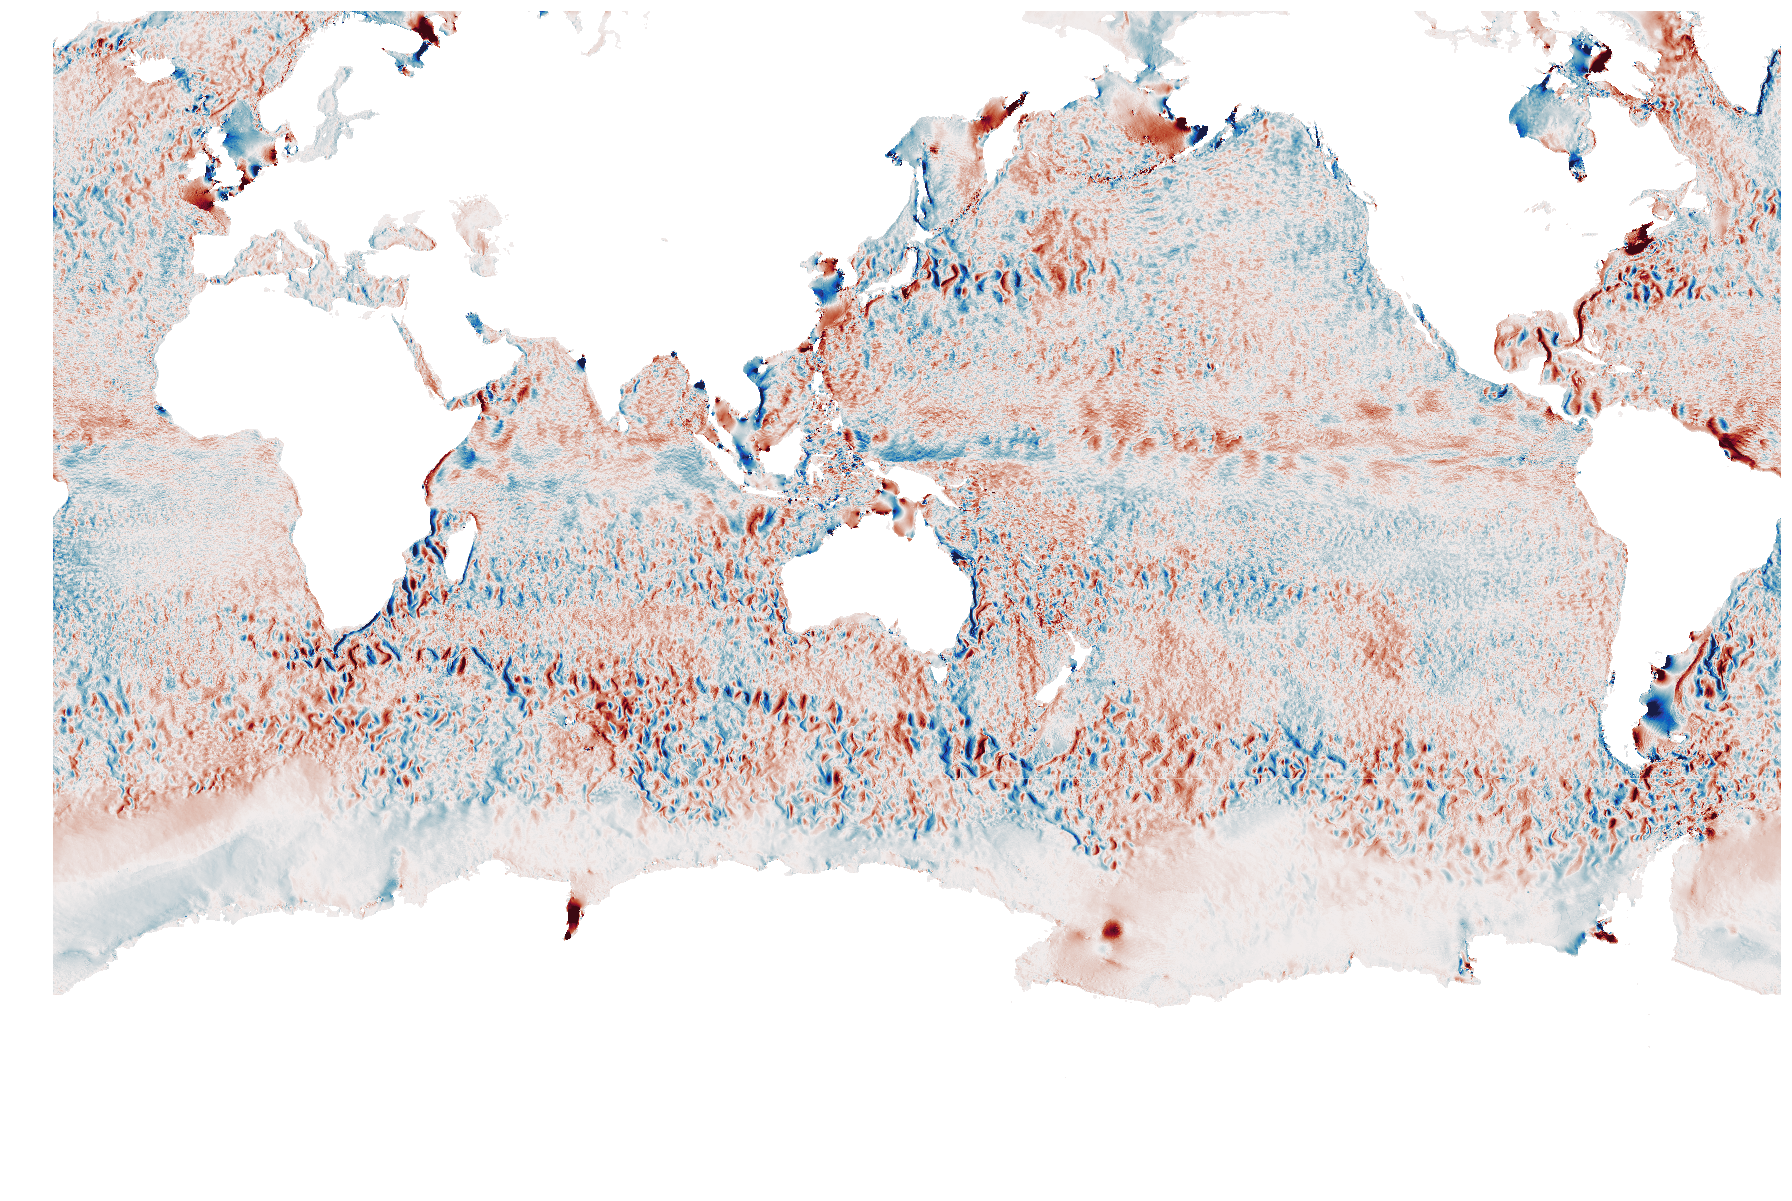

In [39]:
quick_llc_plot(ds_uv['SSV_rotation'].isel(time=1), vmin=-1, vmax=1, add_colorbar=False, axis_off=True, cmap = cm.balance)

In [44]:
cluster.scheduler.close()

<Future finished result=None>